In [1]:
import pandas as pd

/var/folders/kc/5d_pp5b57l9cv1n38nnw2p7r0000gn/T/ipykernel_90315/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
df = pd.read_csv('AviationData.csv', encoding='latin1')
df.head()

/var/folders/kc/5d_pp5b57l9cv1n38nnw2p7r0000gn/T/ipykernel_90315/4088998833.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [22]:
import matplotlib.pyplot as plt


In [25]:
df_clean = df.dropna(subset = ['Number.of.Engines', 'Engine.Type', 'Injury.Severity', 'Aircraft.damage'])
df_clean.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017


In [33]:
make_clean = df_clean['Make'].str.upper()
print(make_clean)

0                  STINSON
1                    PIPER
2                   CESSNA
3                 ROCKWELL
5        MCDONNELL DOUGLAS
               ...        
88639               CESSNA
88647               CESSNA
88661                BEECH
88735    STEPHEN J HOFFMAN
88767             LUSCOMBE
Name: Make, Length: 77935, dtype: object


In [35]:
make_clean_count = make_clean.value_counts()
print(make_clean_count)

Make
CESSNA               25484
PIPER                13996
BEECH                 4913
BELL                  2322
MOONEY                1262
                     ...  
ARMBRUSTER               1
BLANTON                  1
THE OLD HEN CROW         1
HORNER-RYAN              1
STEPHEN J HOFFMAN        1
Name: count, Length: 6953, dtype: int64


In [38]:
df_clean['Make'] = make_clean
df_clean

/var/folders/kc/5d_pp5b57l9cv1n38nnw2p7r0000gn/T/ipykernel_90315/2699477076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Make'] = make_clean


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,304354N,0096752W,PVT,Private,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilots failure to maintain control of the...,20-12-2022
88647,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,034055N,0835224W,LZU,GWINNETT COUNTY - BRISCOE FLD,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,An in-flight collision with a bird while on ap...,20-12-2022
88661,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,034849N,0097722W,1F0,Ardmore Downtown Executive Air,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot did not ensure adequate clearance fr...,20-12-2022
88735,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,293620N,0095959W,EFD,ELLINGTON,...,ASHO,NaN,0.0,1.0,0.0,0.0,VMC,NaN,The pilots failure to secure the magneto swit...,20-12-2022


In [40]:
df_clean.drop(columns=['Event.Id', 'Accident.Number', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'Schedule', 'Air.carrier', 'Publication.Date']) 

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,Accident,1948-10-24,Fatal(2),Destroyed,NaN,STINSON,108-3,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,Accident,1962-07-19,Fatal(4),Destroyed,NaN,PIPER,PA24-180,No,1.0,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,Accident,1974-08-30,Fatal(3),Destroyed,NaN,CESSNA,172M,No,1.0,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,Accident,1977-06-19,Fatal(2),Destroyed,NaN,ROCKWELL,112,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
5,Accident,1979-09-17,Non-Fatal,Substantial,Airplane,MCDONNELL DOUGLAS,DC9,No,2.0,Turbo Fan,Part 129: Foreign,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,Accident,2022-10-06,Non-Fatal,Substantial,Airplane,CESSNA,150,No,1.0,Reciprocating,091,Personal,0.0,0.0,0.0,1.0,VMC,NaN,The pilots failure to maintain control of the...
88647,Accident,2022-10-08,Non-Fatal,Substantial,Airplane,CESSNA,177RG,No,1.0,Reciprocating,091,Personal,0.0,0.0,0.0,2.0,VMC,NaN,An in-flight collision with a bird while on ap...
88661,Accident,2022-10-13,Non-Fatal,Substantial,Airplane,BEECH,B-60,No,2.0,Reciprocating,091,Personal,0.0,0.0,0.0,1.0,VMC,NaN,The pilot did not ensure adequate clearance fr...
88735,Accident,2022-10-29,Minor,Substantial,Airplane,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,091,ASHO,0.0,1.0,0.0,0.0,VMC,NaN,The pilots failure to secure the magneto swit...


In [41]:
df_clean['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    67323
2.0     9392
0.0      617
3.0      315
4.0      286
8.0        2
Name: count, dtype: int64

In [115]:
df_engine_crash = df_clean[['Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                            'Total.Minor.Injuries', 'Total.Uninjured']]
df_engine_crash = df_engine_crash.dropna()
df_engine_crash.to_csv('df_engine_crash.csv', index=False)

In [117]:
df_make_crash = df_clean[['Make','Number.of.Engines', 'Engine.Type', 'Injury.Severity', 'Aircraft.damage']]
df_make_crash.to_csv('df_make_crash.csv', index=False)

In [78]:
df_clean['Make'].value_counts().head(10)

Make
CESSNA      25484
PIPER       13996
BEECH        4913
BELL         2322
MOONEY       1262
GRUMMAN      1137
BELLANCA     1015
BOEING        990
ROBINSON      968
HUGHES        863
Name: count, dtype: int64

In [48]:
df_engine_crash['Total.Fatal.Injuries'].value_counts()

Total.Fatal.Injuries
0.0      52999
1.0       7559
2.0       4422
3.0       1332
4.0        891
         ...  
131.0        1
73.0         1
87.0         1
16.0         1
44.0         1
Name: count, Length: 62, dtype: int64

In [80]:
piper = df_clean[df_clean['Make'] == 'PIPER']
piper

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982
23,20020917X02333,Incident,LAX82IA034,1982-01-03,"VAN NUYS, CA",United States,NaN,NaN,VNY,VAN NUYS,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,03-01-1983
32,20020917X02618,Accident,SEA82FA015,1982-01-04,"PLEASANT HILL, OR",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,04-01-1983
33,20020917X02254,Accident,LAX82FA038,1982-01-04,"NEAR LAS VEGAS, NV",United States,NaN,NaN,NaN,NaN,...,Unknown,Lang Air Service,2.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,04-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88536,20220919105967,Accident,ANC22LA077,2022-09-16,"Anchorage, AK",United States,613038N,1505613W,NaN,Mountain,...,Instructional,Acme Cub,0.0,1.0,0.0,1.0,VMC,NaN,The pilots inadvertent application of the bra...,15-12-2022
88546,20220923105991,Accident,ANC22LA079,2022-09-18,"Tok, AK",United States,621412N,0014175W,NaN,Gravel Bar,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilots improper application of the brakes...,15-12-2022
88565,20220926106000,Accident,ANC22LA081,2022-09-23,"Chignik Lake, AK",United States,562341N,1584954W,NONE,Fan Creek,...,Other Work Use,TRADEWIND LLC,0.0,0.0,0.0,1.0,VMC,NaN,The pilots failure to maintain airplane contr...,15-12-2022
88566,20220928106012,Accident,WPR22LA358,2022-09-23,"South Jordan, UT",United States,403710N,1115934W,U42,South Valley Regional,...,Instructional,NaN,0.0,1.0,0.0,1.0,VMC,NaN,The pilots inability to see and avoid a bird ...,20-12-2022


In [87]:
df_clean['Aircraft.damage'].apply(lambda x: x in ['Substantial', 'Destroyed'])

0        True
1        True
2        True
3        True
5        True
         ... 
88639    True
88647    True
88661    True
88735    True
88767    True
Name: Aircraft.damage, Length: 77935, dtype: bool

In [91]:
df_clean['Dmg.Binary'] = df_clean['Aircraft.damage'].apply(lambda x: x in ['Substantial', 'Destroyed'])
df_clean['Dmg.Binary'].value_counts()

/var/folders/kc/5d_pp5b57l9cv1n38nnw2p7r0000gn/T/ipykernel_90315/3456129494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Dmg.Binary'] = df_clean['Aircraft.damage'].apply(lambda x: x in ['Substantial', 'Destroyed'])


Dmg.Binary
True     75880
False     2055
Name: count, dtype: int64

In [120]:
df_make_crash['Dmg.Binary'] = df_clean['Dmg.Binary']
df_make_crash.to_csv('df_make_crash.csv', index=False)

/var/folders/kc/5d_pp5b57l9cv1n38nnw2p7r0000gn/T/ipykernel_90315/3992178301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_make_crash['Dmg.Binary'] = df_clean['Dmg.Binary']


In [121]:
df_make_crash

,Make,Number.of.Engines,Engine.Type,Injury.Severity,Aircraft.damage,Dmg.Binary
0,STINSON,1.0,Reciprocating,Fatal(2),Destroyed,True
1,PIPER,1.0,Reciprocating,Fatal(4),Destroyed,True
2,CESSNA,1.0,Reciprocating,Fatal(3),Destroyed,True
3,ROCKWELL,1.0,Reciprocating,Fatal(2),Destroyed,True
5,MCDONNELL DOUGLAS,2.0,Turbo Fan,Non-Fatal,Substantial,True
...,...,...,...,...,...,...
88639,CESSNA,1.0,Reciprocating,Non-Fatal,Substantial,True
88647,CESSNA,1.0,Reciprocating,Non-Fatal,Substantial,True
88661,BEECH,2.0,Reciprocating,Non-Fatal,Substantial,True
88735,STEPHEN J HOFFMAN,1.0,Reciprocating,Minor,Substantial,True


In [95]:
df_binary = df_clean[['Make', 'Dmg.Binary']]
df_binary['Dmg.Binary'].apply(int)


0        1
1        1
2        1
3        1
5        1
        ..
88639    1
88647    1
88661    1
88735    1
88767    1
Name: Dmg.Binary, Length: 77935, dtype: int64

In [103]:
dfb_mean = df_binary.groupby('Make')['Dmg.Binary'].mean()

In [107]:
dfb_mean.info()

<class 'pandas.core.series.Series'>
Index: 6953 entries, 107.5 FLYING CORPORATION to ZWICKER MURRAY R
Series name: Dmg.Binary
Non-Null Count  Dtype  
--------------  -----  
6953 non-null   float64
dtypes: float64(1)
memory usage: 366.7+ KB


In [68]:
plane_dmg = df_clean['Aircraft.damage'].value_counts()
plane_dmg

Aircraft.damage
Substantial    59325
Destroyed      16555
Minor           2049
Unknown            6
Name: count, dtype: int64

In [82]:
piper_dmg = piper['Aircraft.damage'].value_counts()

<Axes: xlabel='Aircraft.damage'>

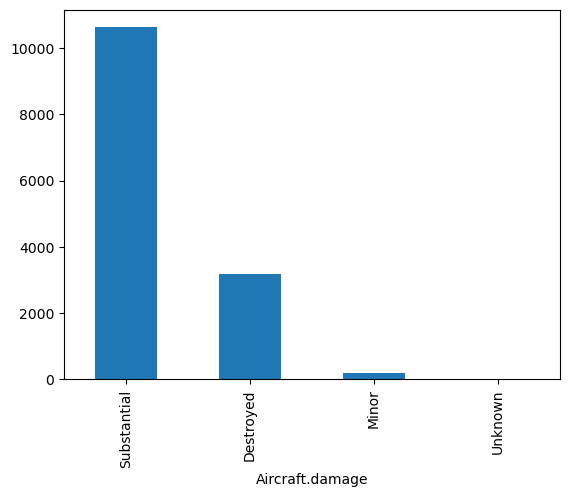

In [83]:
piper_dmg.plot.bar()

<Axes: xlabel='Aircraft.damage'>

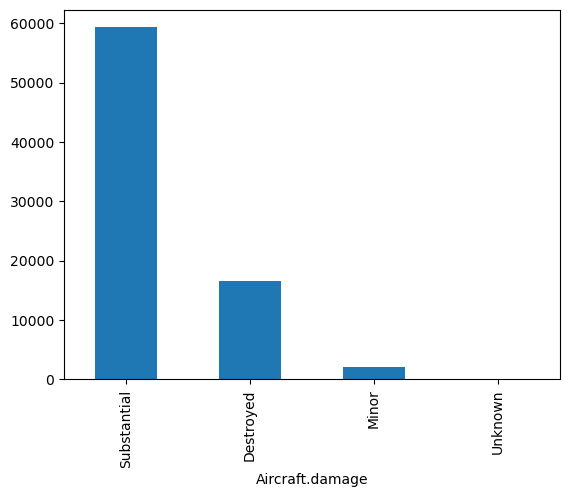

In [69]:
plane_dmg.plot.bar()

In [123]:
df_clean['Make'].value_counts()


Make
CESSNA               25484
PIPER                13996
BEECH                 4913
BELL                  2322
MOONEY                1262
                     ...  
ARMBRUSTER               1
BLANTON                  1
THE OLD HEN CROW         1
HORNER-RYAN              1
STEPHEN J HOFFMAN        1
Name: count, Length: 6953, dtype: int64

In [127]:
top_5_makes = df_make_crash[df_make_crash['Make'].isin(['CESSNA', 'PIPER', 'BEECH', 'BELL', 'MOONEY'])]

In [129]:
top_5_makes.to_csv('top_5_makes.csv', index=False)

In [135]:
top_5_makes['Dmg.Binary'] = top_5_makes['Dmg.Binary'].apply(int)
top_5_makes.to_csv('top_5_makes.csv', index=False)

/var/folders/kc/5d_pp5b57l9cv1n38nnw2p7r0000gn/T/ipykernel_90315/2865973756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_makes['Dmg.Binary'] = top_5_makes['Dmg.Binary'].apply(int)


In [136]:
top_5_makes['Dmg.Binary']

1        1
2        1
6        1
7        1
8        1
        ..
88600    1
88632    1
88639    1
88647    1
88661    1
Name: Dmg.Binary, Length: 47977, dtype: int64

In [157]:
columns_to_drop = ['Event.ID', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'Amateur.Built', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Report.Status', 'Publication.Date']
df_clean.drop(columns_to_drop)

KeyError: "['Event.ID', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'Amateur.Built', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Report.Status', 'Publication.Date'] not found in axis"

In [139]:
top_5_makes['Make'].value_counts()

Make
CESSNA    25484
PIPER     13996
BEECH      4913
BELL       2322
MOONEY     1262
Name: count, dtype: int64

In [141]:

beech = df_clean[df_clean['Make'] ==  'BEECH'] 


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Dmg.Binary
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,NaN,NaN,NaN,TUSKEGEE,...,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,True
15,20020917X02117,Accident,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,True
47,20020917X01913,Accident,DEN82DA015,1982-01-06,"JACKSON, WY",United States,NaN,NaN,NaN,JACKSON HOLE,...,NaN,0.0,0.0,0.0,3.0,VMC,Climb,Probable Cause,06-01-1983,True
52,20020917X01659,Accident,ATL82DA031,1982-01-07,"WESTMINISTER, MD",United States,NaN,NaN,2W2,CLEARVIEW,...,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,07-01-1983,True
82,20020917X02111,Accident,FTW82FPA10,1982-01-12,"ADDISON, TX",United States,NaN,NaN,11,ADDISON,...,NaN,0.0,1.0,0.0,1.0,IMC,Descent,Probable Cause,12-01-1983,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87919,20220621105287,Accident,CEN22LA259,2022-06-05,"Mesquite, TX",United States,324516N,0963149W,HQZ,MESQUITE METRO,...,NaN,0.0,0.0,0.0,3.0,VMC,NaN,A collapse of the airplanes landing gear duri...,06-10-2022,True
88099,20220714105471,Accident,ERA22LA311,2022-07-05,"Livingston, TN",United States,362449N,0851838W,8A3,LIVINGSTON MUNI,...,NaN,0.0,0.0,0.0,2.0,VMC,NaN,"The pilots improper flare, which resulted in ...",03-11-2022,True
88444,20220906105869,Accident,CEN22LA409,2022-08-31,"Eden Prairie, MN",United States,444942N,0932723W,KFCM,FLYING CLOUD,...,SKYSURV INC,0.0,0.0,0.0,1.0,VMC,NaN,The student pilot's failure to maintain direct...,08-12-2022,True
88478,20220906105861,Accident,CEN22LA407,2022-09-05,"Tupelo, MS",United States,034168N,0884611W,KTUP,TUPELO RGNL,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilots failure to extend the landing gear...,06-10-2022,True
